# Modelling tides

## Using `model_tides`

Modelling tides using FES2014


<Axes: xlabel='time'>

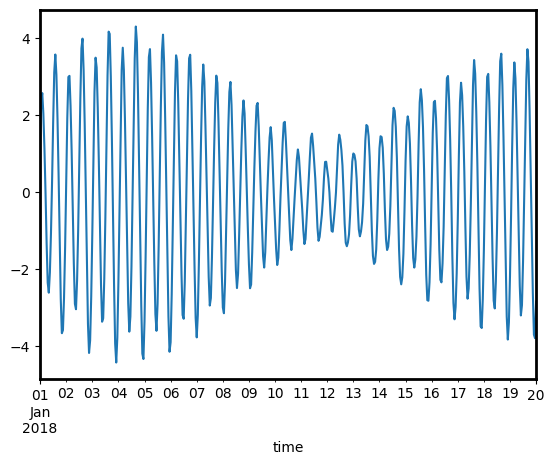

In [1]:
from eo_tides.model import model_tides
import pandas as pd

modelled_df = model_tides(
    x=122.2186, 
    y=-18.0008, 
    time=pd.date_range("2018-01-01", "2018-01-20", freq="1h"), 
    directory="../../tests/data/tide_models_tests"
)

# Plot
modelled_df.reset_index(["x", "y"]).tide_m.plot()

### Validation against GESLA tide gauges

In [2]:
from eo_tides.validation import eval_metrics, load_gauge_gesla

# Load gauge data, subtracting to observed mean sea level
gauge_df = load_gauge_gesla(
    x=122.3186,
    y=-18.0008,
    time=("2018-01-01", "2018-01-20"),
    correct_mean=True,
    data_path="../../tests/data/",
    metadata_path="../../tests/data/GESLA3_ALL 2.csv"
)
gauge_df.head()


/workspaces/eo-tides/.venv/lib/python3.12/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(
/workspaces/eo-tides/eo_tides/validation.py:157: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  pd.read_csv(


sea_level  qc_flag  use_flag  \
site_code time                                                
62650     2018-01-01 00:00:00   1.204227        1         1   
          2018-01-01 01:00:00   2.307227        1         1   
          2018-01-01 02:00:00   2.708227        1         1   
          2018-01-01 03:00:00   2.133227        1         1   
          2018-01-01 04:00:00   1.045227        1         1   

                                                           file_name  \
site_code time                                                         
62650     2018-01-01 00:00:00  ../../tests/data/broome-62650-aus-bom   
          2018-01-01 01:00:00  ../../tests/data/broome-62650-aus-bom   
          2018-01-01 02:00:00  ../../tests/data/broome-62650-aus-bom   
          2018-01-01 03:00:00  ../../tests/data/broome-62650-aus-bom   
          2018-01-01 04:00:00  ../../tests/data/broome-62650-aus-bom   

                              site_name country contributor_abbreviated  \
site_code time                                                            
62650     2018-01-01 00:00:00    Broome     AUS                     BOM   
          2018-01-01 01:00:00    Broome     AUS                     BOM   
          2018-01-01 02:00:00    Broome     AUS                     BOM   
          2018-01-01 03:00:00    Broome     AUS                     BOM   
          2018-01-01 04:00:00    Broome     AUS                     BOM   

                                    contributor_full  \
site_code time                                         
62650     2018-01-01 00:00:00  Bureau of Meteorology   
          2018-01-01 01:00:00  Bureau of Meteorology   
          2018-01-01 02:00:00  Bureau of Meteorology   
          2018-01-01 03:00:00  Bureau of Meteorology   
          2018-01-01 04:00:00  Bureau of Meteorology   

                                                             contributor_website  \
site_code time                                                                     
62650     2018-01-01 00:00:00  http://www.bom.gov.au/oceanography/projects/nt...   
          2018-01-01 01:00:00  http://www.bom.gov.au/oceanography/projects/nt...   
          2018-01-01 02:00:00  http://www.bom.gov.au/oceanography/projects/nt...   
          2018-01-01 03:00:00  http://www.bom.gov.au/oceanography/projects/nt...   
          2018-01-01 04:00:00  http://www.bom.gov.au/oceanography/projects/nt...   

                              contributor_contact  ... start_date_time  \
site_code time                                     ...                   
62650     2018-01-01 00:00:00    tides@bom.gov.au  ...  2/07/1966 0:00   
          2018-01-01 01:00:00    tides@bom.gov.au  ...  2/07/1966 0:00   
          2018-01-01 02:00:00    tides@bom.gov.au  ...  2/07/1966 0:00   
          2018-01-01 03:00:00    tides@bom.gov.au  ...  2/07/1966 0:00   
          2018-01-01 04:00:00    tides@bom.gov.au  ...  2/07/1966 0:00   

                                  end_date_time number_of_years  \
site_code time                                                    
62650     2018-01-01 00:00:00  31/12/2019 23:00              51   
          2018-01-01 01:00:00  31/12/2019 23:00              51   
          2018-01-01 02:00:00  31/12/2019 23:00              51   
          2018-01-01 03:00:00  31/12/2019 23:00              51   
          2018-01-01 04:00:00  31/12/2019 23:00              51   

                               time_zone_hours  \
site_code time                                   
62650     2018-01-01 00:00:00                0   
          2018-01-01 01:00:00                0   
          2018-01-01 02:00:00                0   
          2018-01-01 03:00:00                0   
          2018-01-01 04:00:00                0   

                                                    datum_information  \
site_code time                                                          
62650     2018-01-01 00:00:00  Chart Datum / Lowest Astronomical Tide   
          2018-01

Correlation         0.998
RMSE                0.144
MAE                 0.113
R-squared           0.995
Bias                0.004
Regression slope    0.986
dtype: float64

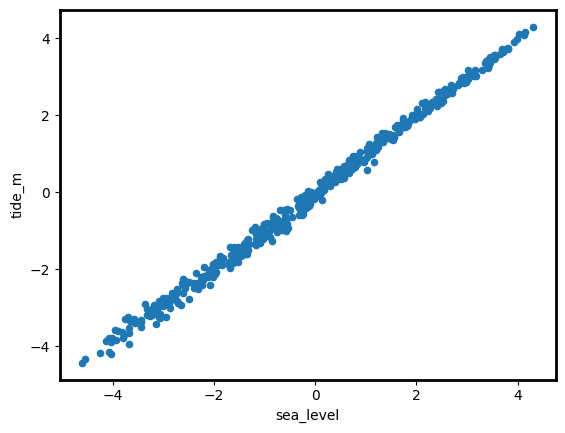

In [3]:
# Combine modelled and observed gauge data and compare
joined_df = gauge_df.join(modelled_df)
joined_df.plot.scatter(x="sea_level", y="tide_m")
eval_metrics(x=joined_df.sea_level, y=joined_df.tide_m)